<a href="https://colab.research.google.com/github/kartikayv/zomato/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('/content/zomato.csv')

In [6]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
data.shape

(607, 17)

In [8]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
data = data.drop(['url','address','phone','menu_item',
       'listed_in(type)', 'listed_in(city)'],axis=1)

In [12]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1/5,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1/5,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8/5,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7/5,88.0,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8/5,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [10]:
data.shape

(607, 11)

In [11]:
data.isna().sum()

name                             1
online_order                     1
book_table                       1
rate                            81
votes                            1
location                         1
rest_type                        2
dish_liked                     356
cuisines                         1
approx_cost(for two people)      2
reviews_list                     1
dtype: int64

**Data Cleaning**

In [13]:
feature_na = [i for i in data.columns if data[i].isnull().sum()>0]
feature_na

['name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list']

In [14]:
for i in feature_na:
  print(f'{i} has {np.round((data[i].isnull().sum()/len(data[i])*100),4)}% null values')

name has 0.1647% null values
online_order has 0.1647% null values
book_table has 0.1647% null values
rate has 13.3443% null values
votes has 0.1647% null values
location has 0.1647% null values
rest_type has 0.3295% null values
dish_liked has 58.6491% null values
cuisines has 0.1647% null values
approx_cost(for two people) has 0.3295% null values
reviews_list has 0.1647% null values


In [15]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.7/5', '3.4 /5', '-', '3.6 /5', '2.5/5'], dtype=object)

In [16]:
data.dropna(subset=['rate'],axis=0,inplace=True)

In [17]:
def split(x):
  return x.split('/')[0].strip()

In [18]:
data['rate']=data['rate'].apply(split)

In [19]:
data['rate']

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
601    3.3
602    3.4
603    3.5
604    3.3
605    3.4
Name: rate, Length: 526, dtype: object

In [20]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.7', '-', '2.5'], dtype=object)

In [21]:
data['rate'].replace(['NEW','-'],0,inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 605
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         526 non-null    object 
 1   online_order                 526 non-null    object 
 2   book_table                   526 non-null    object 
 3   rate                         526 non-null    object 
 4   votes                        526 non-null    float64
 5   location                     526 non-null    object 
 6   rest_type                    526 non-null    object 
 7   dish_liked                   251 non-null    object 
 8   cuisines                     526 non-null    object 
 9   approx_cost(for two people)  525 non-null    object 
 10  reviews_list                 526 non-null    object 
dtypes: float64(1), object(10)
memory usage: 49.3+ KB


In [23]:
data['rate']=data['rate'].astype(float)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 605
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         526 non-null    object 
 1   online_order                 526 non-null    object 
 2   book_table                   526 non-null    object 
 3   rate                         526 non-null    float64
 4   votes                        526 non-null    float64
 5   location                     526 non-null    object 
 6   rest_type                    526 non-null    object 
 7   dish_liked                   251 non-null    object 
 8   cuisines                     526 non-null    object 
 9   approx_cost(for two people)  525 non-null    object 
 10  reviews_list                 526 non-null    object 
dtypes: float64(2), object(9)
memory usage: 49.3+ KB


**Calculate Average rating for each restaurant**

In [25]:
rating = pd.pivot_table(data,index='name',values='rate')
rating

,rate
name,
1947,4.05
1980s Games Cafe,3.40
360 Atoms Restaurant And Cafe,3.10
4th Tea Block,4.00
@Italy,4.10
...,...
Waffle-A-Go Go,3.90
Wahab,3.70
Wamama,4.20


In [26]:
rating=rating.sort_values(['rate'],ascending=False)
rating[0:15]

,rate
name,
The Blue Wagon - Kitchen,4.6
Onesta,4.6
Shakes Theory,4.5
Milano Ice Cream,4.5
Meghana Foods,4.4
Poonam Sweets,4.4
Bubblewrap Waffle Co.,4.4
Karma Kaapi,4.4
Natural Ice Cream,4.4


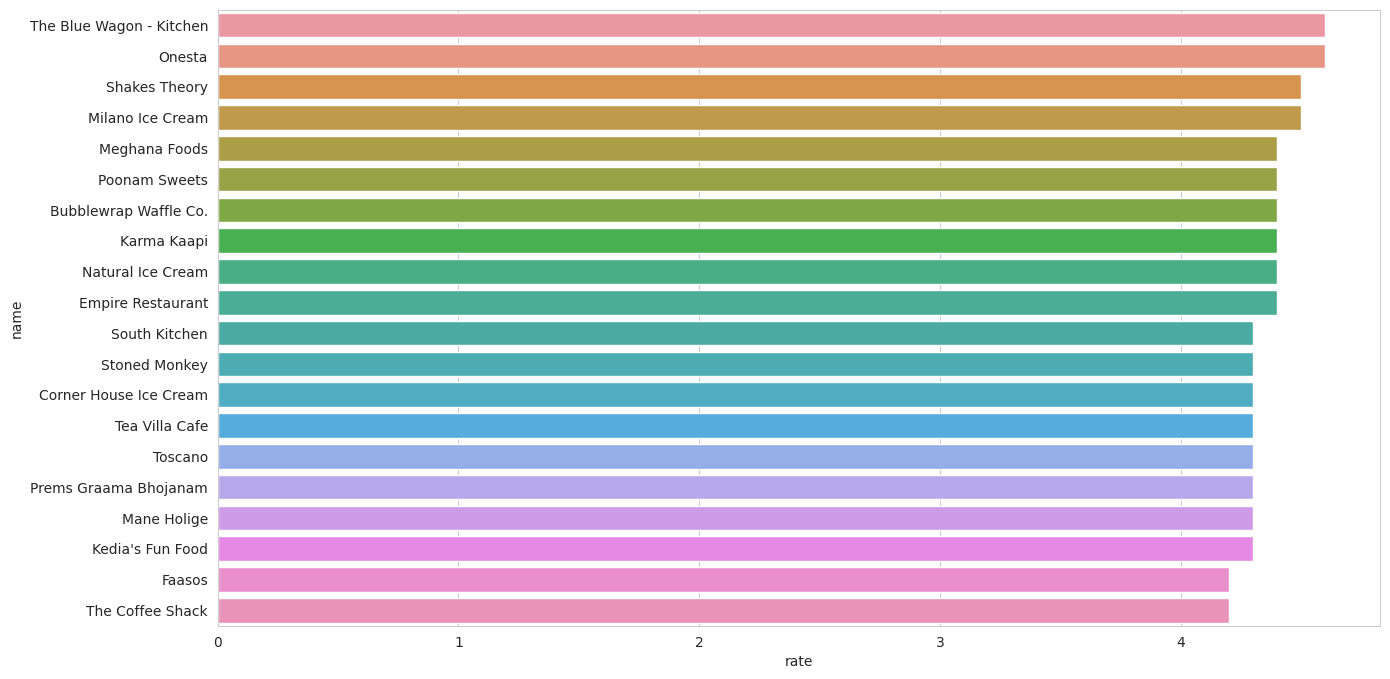

In [78]:
plt.figure(figsize=(15,8))
sns.barplot(x=rating[0:20].rate, y=rating[0:20].index, orient='h')
plt.show()

**Distribution of ratings**

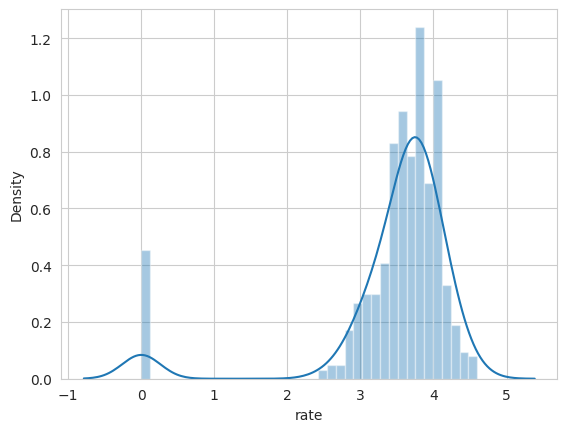

In [65]:
sns.set_style('whitegrid')
sns.distplot(data['rate'])
plt.show()

In [66]:
from scipy.stats import normaltest
DataToTest = data['rate']
stat,p = normaltest(DataToTest)
print('stat=%0.2f, p=%0.30f' % (stat,p))

if p>0.05:
  print('Normal Distribution')
else:
  print('Not a normal distribution')

stat=335.36, p=0.000000000000000000000000000000
Not a normal distribution


**Top restaurant chains**

In [67]:
data['name'].value_counts()

Corner House Ice Cream            3
Redberrys                         3
Iceberg Icecreams                 2
Nandhini Deluxe                   2
Hari Super Sandwich               2
                                 ..
Targaryen's Kitchen               1
Siddique Kabab Centre             1
Eshanya                           1
Parika Multicuisine Restaurant    1
Kolkata King                      1
Name: name, Length: 433, dtype: int64

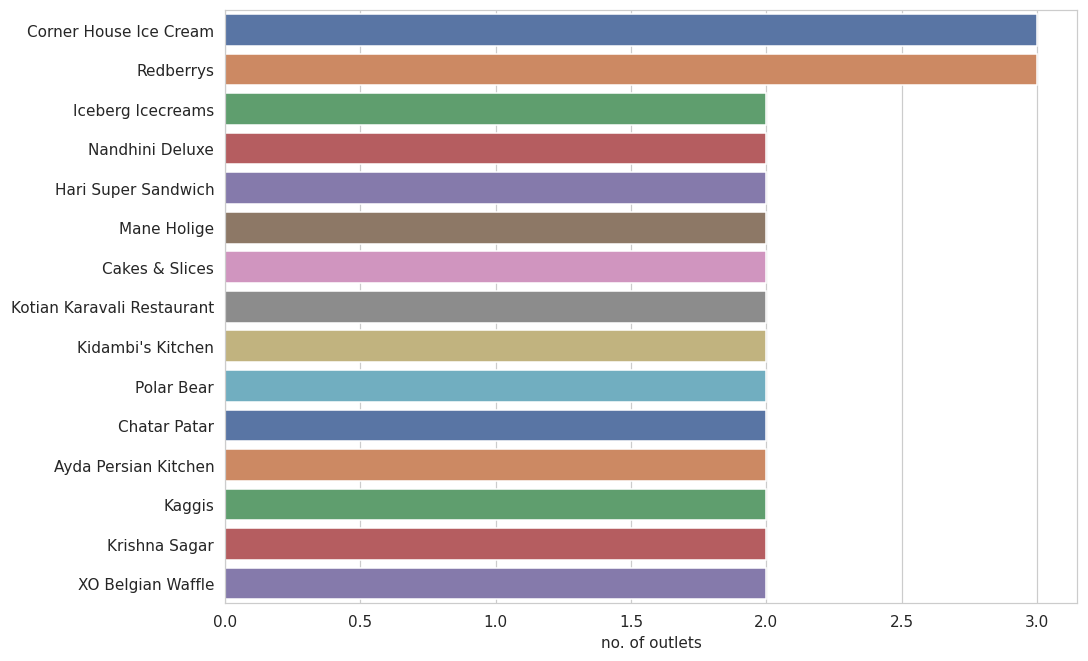

In [79]:
plt.figure(figsize=(10,7),dpi=110)
chains = data['name'].value_counts()[0:15]
sns.barplot(x=chains, y=chains.index, palette='deep')
plt.xlabel('no. of outlets')
plt.show()

**Restaurants doesn't accept online orders**


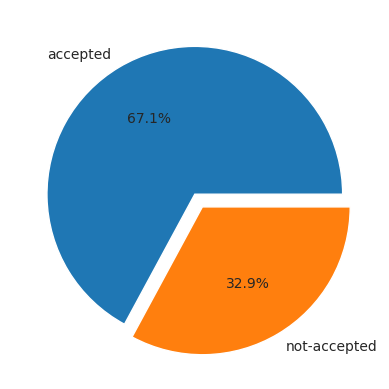

In [80]:
x=data.online_order.value_counts()
labels = ['accepted', 'not-accepted']
plt.pie(x,labels=labels, explode=[0.0,0.1],autopct='%1.1f%%')
plt.show()

**Restaurants having table booking facility**

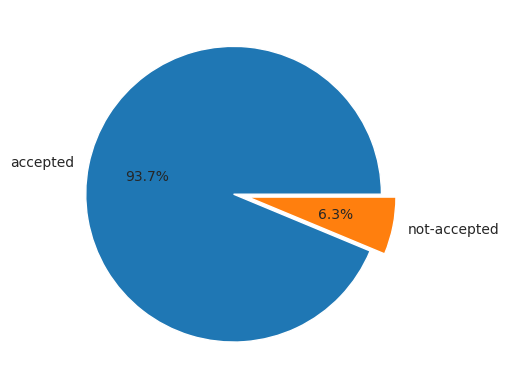

In [81]:
x=data.book_table.value_counts()
labels = ['accepted', 'not-accepted']
plt.pie(x,labels=labels, explode=[0.0,0.1], autopct='%1.1f%%')
plt.show()

**Analysis on types of restaurants**

In [85]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [82]:
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Food Court', 'Lounge',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Beverage Shop, Quick Bites',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Dessert Parlor',
       'Takeaway', 'Pub, Casual Dining'], dtype=object)

In [83]:
len(data.rest_type.unique())

30

In [86]:
data.rest_type.value_counts()

Quick Bites                      216
Casual Dining                    107
Cafe                              48
Dessert Parlor                    39
Bakery                            19
Delivery                          13
Takeaway, Delivery                12
Beverage Shop                     11
Sweet Shop                         9
Sweet Shop, Quick Bites            6
Bar                                6
Quick Bites, Cafe                  4
Casual Dining, Cafe                4
Bakery, Quick Bites                4
Cafe, Casual Dining                4
Kiosk                              3
Beverage Shop, Quick Bites         3
Cafe, Quick Bites                  2
Food Court                         2
Dessert Parlor, Sweet Shop         2
Pub                                2
Food Truck                         2
Quick Bites, Dessert Parlor        1
Beverage Shop, Dessert Parlor      1
Takeaway                           1
Mess                               1
Lounge                             1
F

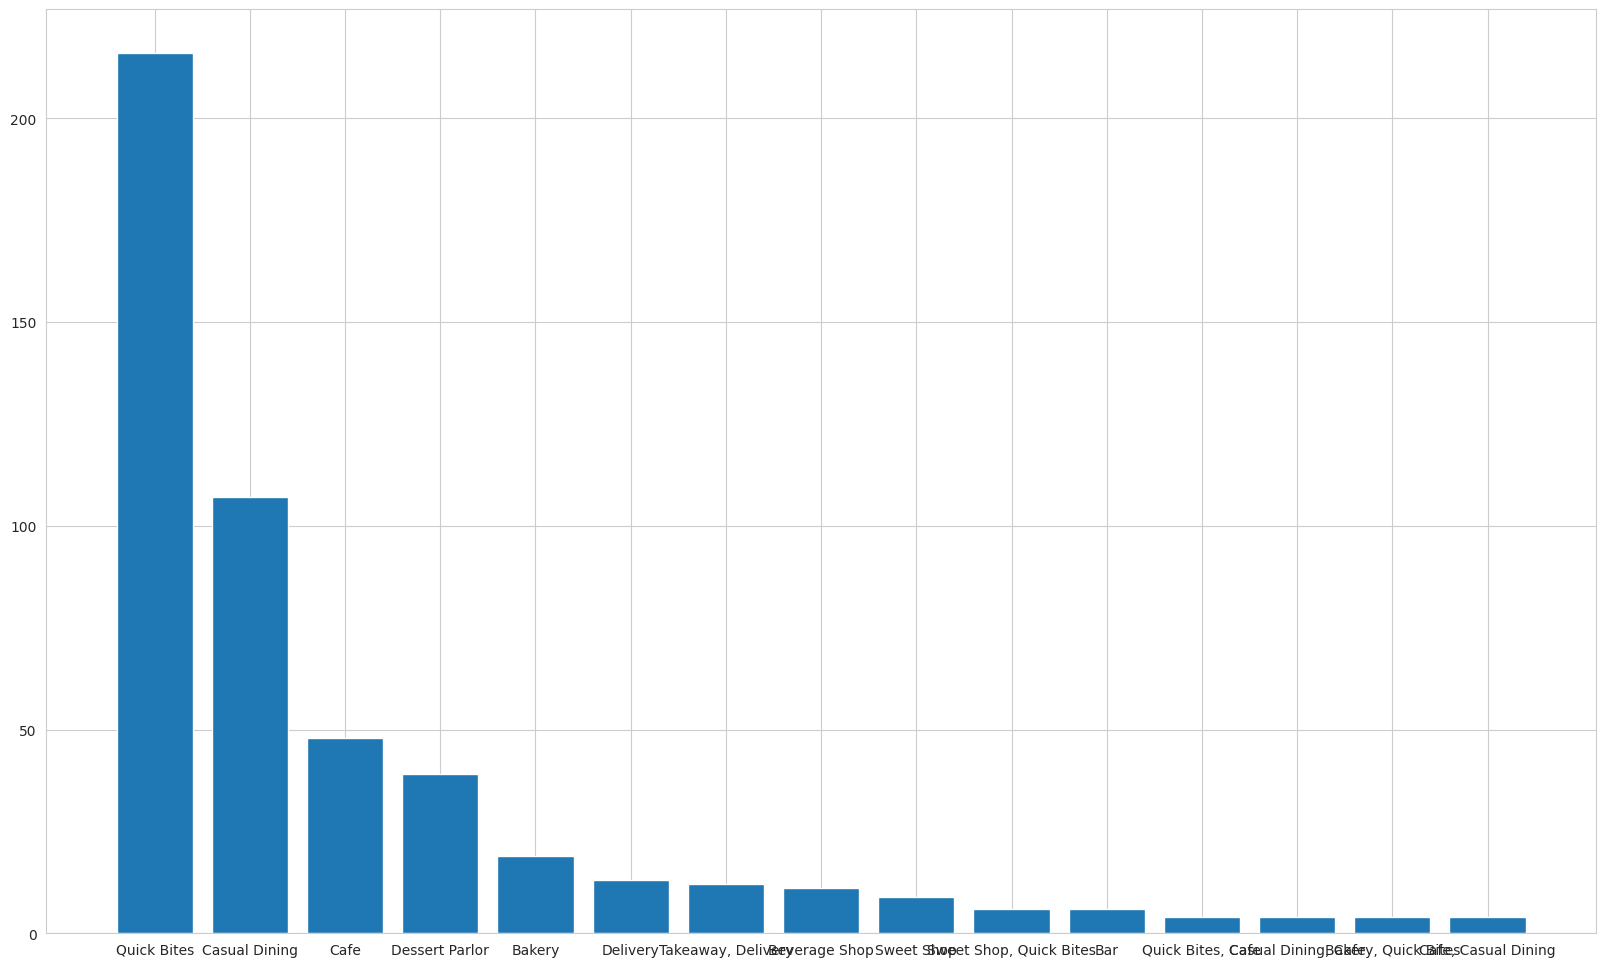

In [84]:
plt.figure(figsize=(20,12))
rest_type = data.rest_type.value_counts()[0:15]
plt.bar(rest_type.index, rest_type)
plt.show()

**Highest voted restaurants**

In [110]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."


In [88]:
voting = data.groupby('name')[['votes']].mean()
voting

,votes
name,
1947,1555.5
1980s Games Cafe,58.0
360 Atoms Restaurant And Cafe,13.0
4th Tea Block,62.0
@Italy,305.0
...,...
Waffle-A-Go Go,70.0
Wahab,97.0
Wamama,354.0


In [89]:
voting['votes'].describe()

count     433.000000
mean      187.659353
std       428.522702
min         0.000000
25%        19.500000
50%        58.000000
75%       176.000000
max      4884.000000
Name: votes, dtype: float64

In [100]:
high_vote = voting[voting['votes']>100]

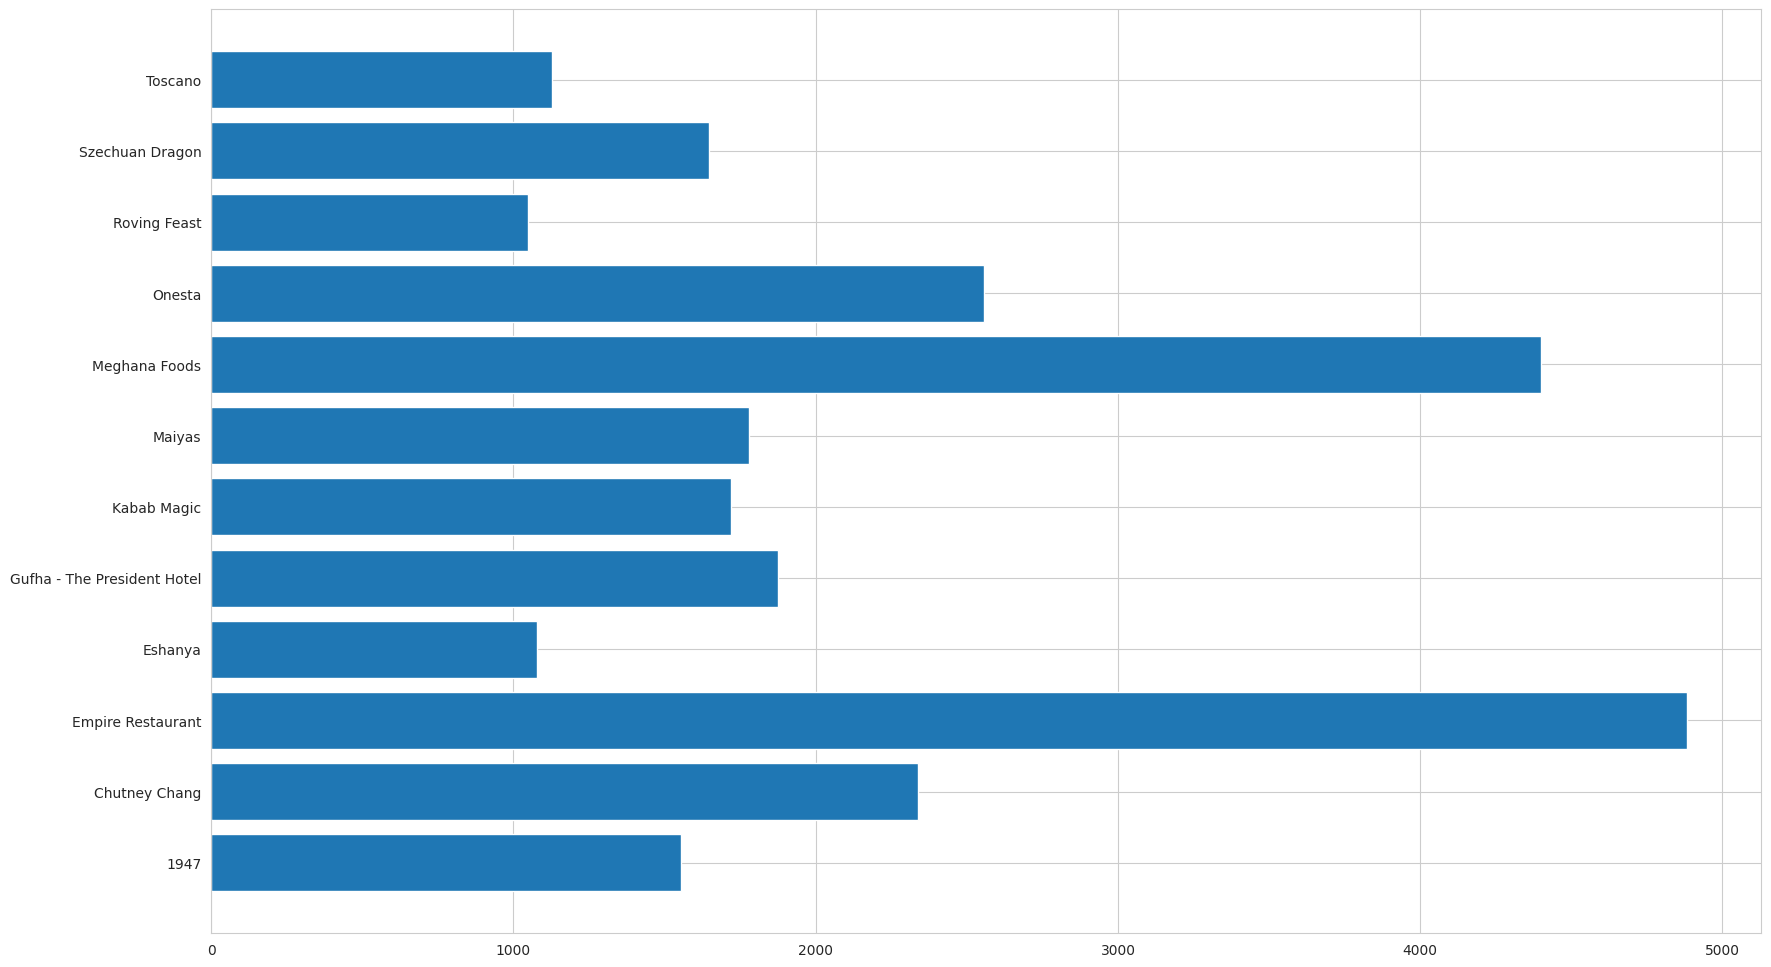

In [106]:
plt.figure(figsize=(20,12))
high_vote = voting[voting['votes']>1000]
plt.barh(high_vote.index, high_vote['votes'])
plt.show()

**Highly and worst rated restaurants based on the ratings given**

In [109]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."


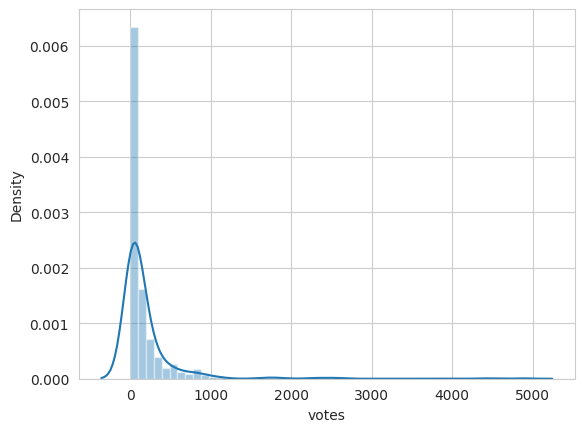

In [111]:
sns.distplot(data['votes'])
plt.show()

In [114]:
voting_rating = data.groupby('name')[['votes']].mean().sort_values('votes', ascending=False)
voting_rating

,votes
name,
Empire Restaurant,4884.0
Meghana Foods,4401.0
Onesta,2556.0
Chutney Chang,2339.0
Gufha - The President Hotel,1875.0
...,...
Thyme & Whisk,0.0
Bitez,0.0
Spicy Tandoor,0.0


In [115]:
voting_rating['name']= voting_rating.index

In [116]:
voting_rating = voting_rating.reset_index(drop=True)
voting_rating.head()

,votes,name
0,4884.0,Empire Restaurant
1,4401.0,Meghana Foods
2,2556.0,Onesta
3,2339.0,Chutney Chang
4,1875.0,Gufha - The President Hotel


In [117]:
voting_rating = pd.merge(voting_rating, data[['rate', 'name']])
voting_rating

,votes,name,rate
0,4884.0,Empire Restaurant,4.4
1,4401.0,Meghana Foods,4.4
2,2556.0,Onesta,4.6
3,2556.0,Onesta,4.6
4,2339.0,Chutney Chang,4.1
...,...,...,...
521,0.0,Bitez,0.0
522,0.0,Spicy Tandoor,0.0
523,0.0,Spicy Tandoor,0.0
524,0.0,Sharma Ji Chaats And Desi khana,0.0


In [118]:
vote_top = voting_rating[voting_rating['votes']>1000]
vote_top.head()

,votes,name,rate
0,4884.0,Empire Restaurant,4.4
1,4401.0,Meghana Foods,4.4
2,2556.0,Onesta,4.6
3,2556.0,Onesta,4.6
4,2339.0,Chutney Chang,4.1


In [119]:
vote_top = vote_top.groupby('name')[['rate']].mean().sort_values('rate', ascending=False)
vote_top

,rate
name,
Onesta,4.60
Empire Restaurant,4.40
Meghana Foods,4.40
Toscano,4.30
Szechuan Dragon,4.20
Chutney Chang,4.10
Eshanya,4.10
Gufha - The President Hotel,4.10
Kabab Magic,4.10


**Highest rated based on most number of votes**

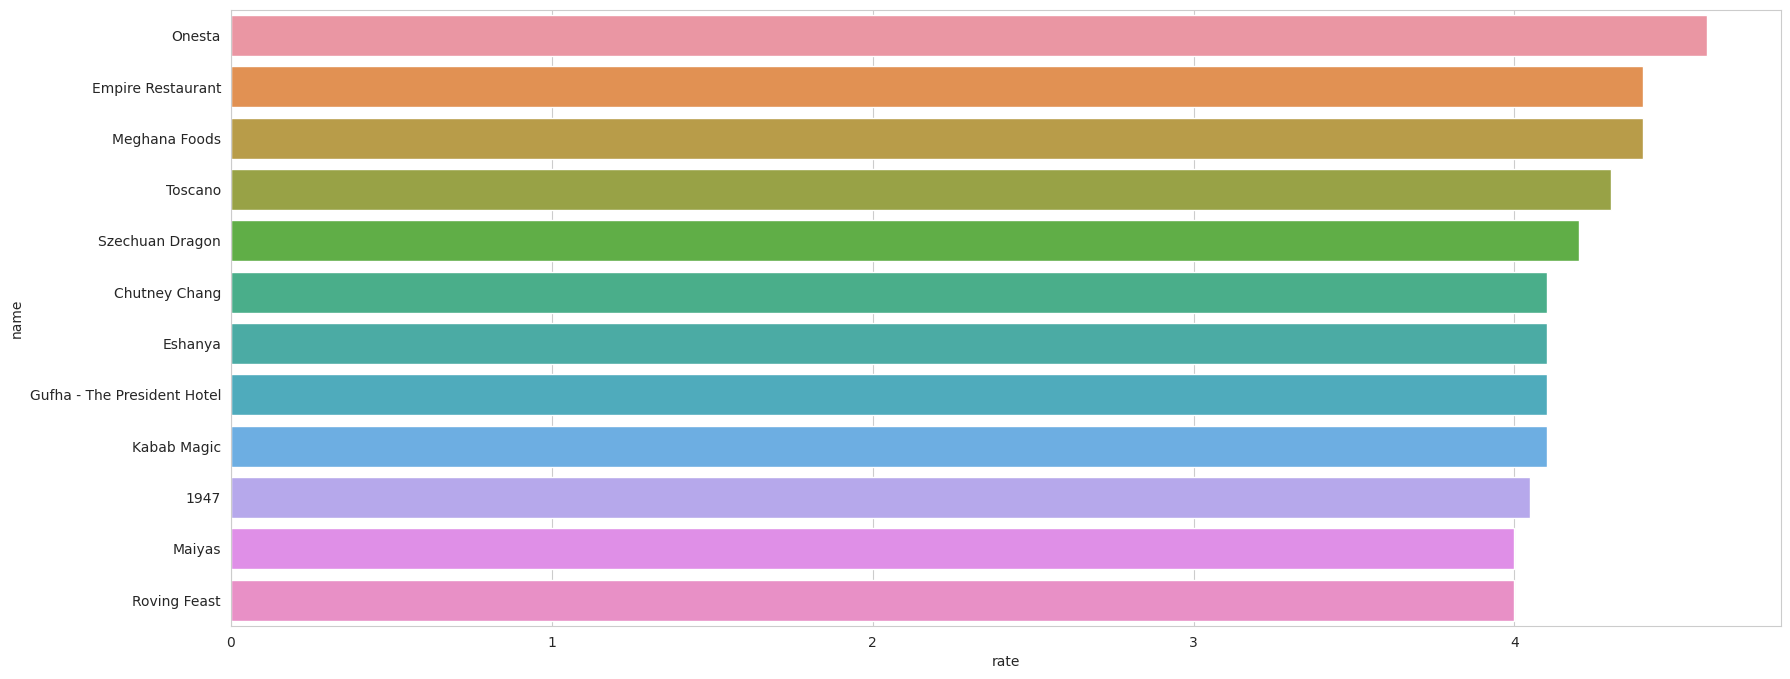

In [121]:
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(x=vote_top['rate'], y=vote_top.index, orient='h')
plt.show()

In [122]:
bad_count = voting_rating[(voting_rating['rate']<3)& (voting_rating['rate']>0)]
bad_count

,votes,name,rate
44,506.0,Foodiction,2.8
58,403.5,Beijing Bites,2.7
76,308.5,Nandhini Deluxe,2.6
95,247.0,Dal Tadkaa,2.5
104,231.0,Mast Punjabi,2.6
129,177.0,Ugadi,2.9
144,157.0,Java City,2.6
178,123.0,Ruchi's Corner,2.7
201,97.0,A2B Veg - Adyar Ananda Bhavan,2.7
207,91.0,Fast And Fresh,2.8


In [124]:
bad_restaurants = bad_count[bad_count['votes']>500].groupby('name')[['rate']].mean()
bad_restaurants

,rate
name,
Foodiction,2.8


**Worst restaurants based on highest number of votes given**

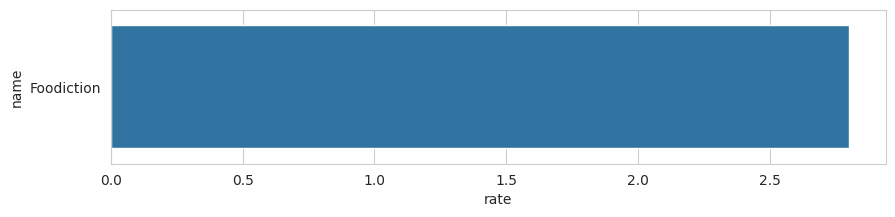

In [134]:
plt.figure(figsize=(10,2))
sns.barplot(x=bad_restaurants['rate'], y=bad_restaurants.index)
plt.show()

**Location which have highest number of restaurants**

In [135]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [136]:
location_restro = data[['location']].value_counts()[0:20]
location_restro

location             
Banashankari             206
Jayanagar                121
Basavanagudi             117
Kumaraswamy Layout        37
JP Nagar                   7
Mysore Road                7
Uttarahalli                6
City Market                6
Wilson Garden              5
Shanti Nagar               3
Vijay Nagar                3
Rajarajeshwari Nagar       2
South Bangalore            2
Koramangala 7th Block      1
Richmond Road              1
Bannerghatta Road          1
BTM                        1
dtype: int64

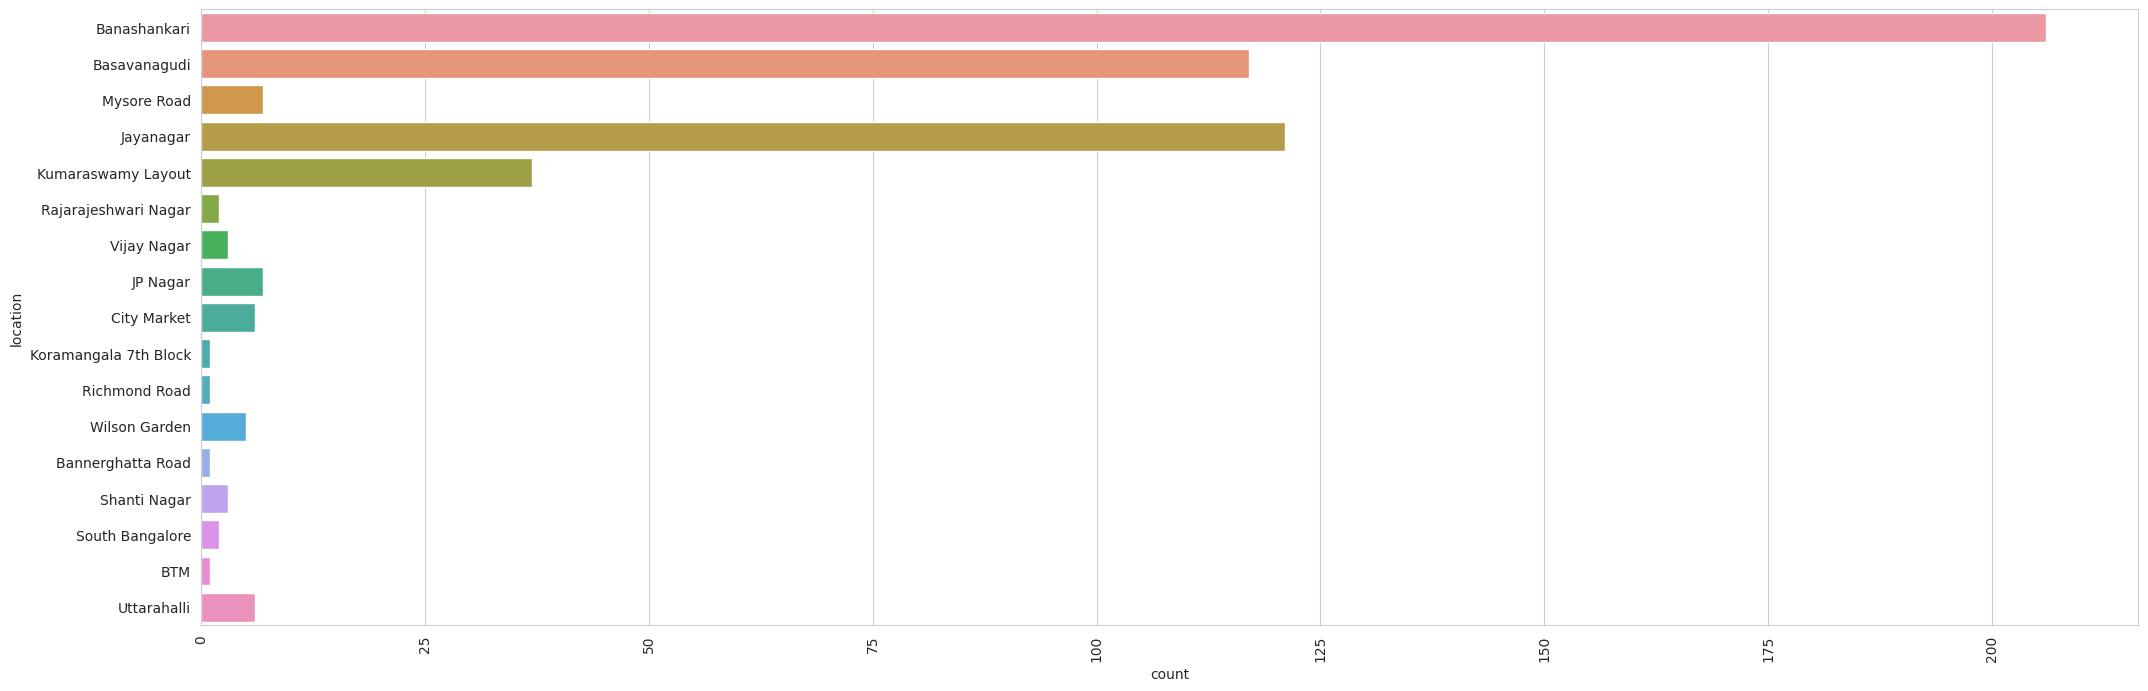

In [140]:
plt.figure(figsize=(25,8))
sns.countplot(y=data['location'])
plt.xticks(rotation=90)
plt.show()

**Top 10 cuisines**

In [141]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list
0,Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [142]:
data.rest_type.value_counts()

Quick Bites                      216
Casual Dining                    107
Cafe                              48
Dessert Parlor                    39
Bakery                            19
Delivery                          13
Takeaway, Delivery                12
Beverage Shop                     11
Sweet Shop                         9
Sweet Shop, Quick Bites            6
Bar                                6
Quick Bites, Cafe                  4
Casual Dining, Cafe                4
Bakery, Quick Bites                4
Cafe, Casual Dining                4
Kiosk                              3
Beverage Shop, Quick Bites         3
Cafe, Quick Bites                  2
Food Court                         2
Dessert Parlor, Sweet Shop         2
Pub                                2
Food Truck                         2
Quick Bites, Dessert Parlor        1
Beverage Shop, Dessert Parlor      1
Takeaway                           1
Mess                               1
Lounge                             1
F

South Indian                           35
North Indian, Chinese                  25
North Indian                           23
Fast Food                              16
Bakery, Desserts                       14
South Indian, North Indian, Chinese    12
Bakery                                 12
Ice Cream, Desserts                    10
Biryani                                 7
Desserts                                7
Name: cuisines, dtype: int64


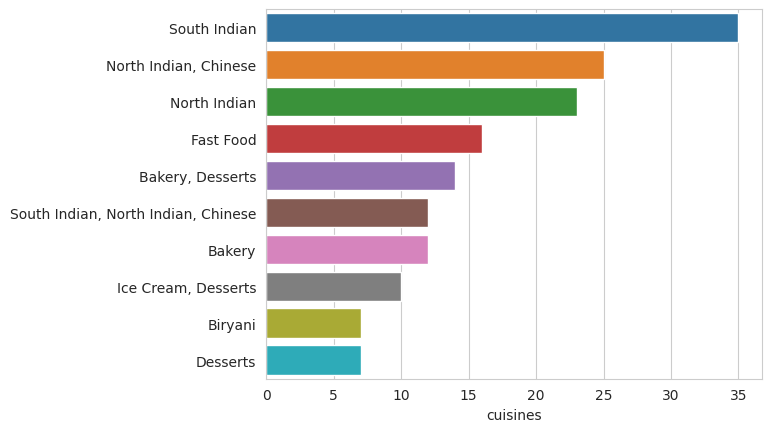

In [147]:
cuisine = data.cuisines.value_counts()[0:10]
print(cuisine)
sns.barplot(y=cuisine.index, x=cuisine)
plt.xticks(rotation=0)
plt.show()